In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\gjrre\Documents\Python Project\Firearm Mortality\data-table1.csv')

In [3]:
df

,YEAR,STATE,RATE,DEATHS,URL
0,2020,AL,23.6,1141,/nchs/pressroom/states/alabama/al.htm
1,2020,AK,23.5,175,/nchs/pressroom/states/alaska/ak.htm
2,2020,AZ,16.7,1265,/nchs/pressroom/states/arizona/az.htm
3,2020,AR,22.6,673,/nchs/pressroom/states/arkansas/ar.htm
4,2020,CA,8.5,3449,/nchs/pressroom/states/california/ca.htm
...,...,...,...,...,...
395,2005,VA,11.5,888,/nchs/pressroom/states/virginia/virginia.htm
396,2005,WA,8.8,567,/nchs/pressroom/states/washington/washington.htm
397,2005,WV,13.8,261,/nchs/pressroom/states/westvirginia/westvirgin...
398,2005,WI,8.5,474,/nchs/pressroom/states/wisconsin/wisconsin.htm


In [4]:
'''
Data is taken from the CDC regarding Firearm Mortality by State
The data covers sequential years 2014 - 2020
2005 data is also included in the data set, but because it's an outlier, I remove 2005
'''

df1 = df[df['YEAR'] > 2005]

In [5]:
df1

,YEAR,STATE,RATE,DEATHS,URL
0,2020,AL,23.6,1141,/nchs/pressroom/states/alabama/al.htm
1,2020,AK,23.5,175,/nchs/pressroom/states/alaska/ak.htm
2,2020,AZ,16.7,1265,/nchs/pressroom/states/arizona/az.htm
3,2020,AR,22.6,673,/nchs/pressroom/states/arkansas/ar.htm
4,2020,CA,8.5,3449,/nchs/pressroom/states/california/ca.htm
...,...,...,...,...,...
345,2014,VA,10.3,889,/nchs/pressroom/states/virginia/virginia.htm
346,2014,WA,9.7,702,/nchs/pressroom/states/washington/washington.htm
347,2014,WV,14.6,286,/nchs/pressroom/states/westvirginia/westvirgin...
348,2014,WI,8.2,487,/nchs/pressroom/states/wisconsin/wisconsin.htm


In [6]:
df_AL = df1[df1['STATE'] == 'AL']

In [7]:
df_AL

,YEAR,STATE,RATE,DEATHS,URL
0,2020,AL,23.6,1141,/nchs/pressroom/states/alabama/al.htm
50,2019,AL,22.2,1076,/nchs/pressroom/states/alabama/al.htm
100,2018,AL,21.8,1064,/nchs/pressroom/states/alabama/al.htm
150,2017,AL,22.9,1124,/nchs/pressroom/states/alabama/alabama.htm
200,2016,AL,21.5,1046,/nchs/pressroom/states/alabama/alabama.htm
250,2015,AL,19.6,958,/nchs/pressroom/states/alabama/alabama.htm
300,2014,AL,16.9,815,/nchs/pressroom/states/alabama/alabama.htm


[Text(0.5, 1.0, 'Range and Median Firearm Deaths by State from 2014 - 2020')]

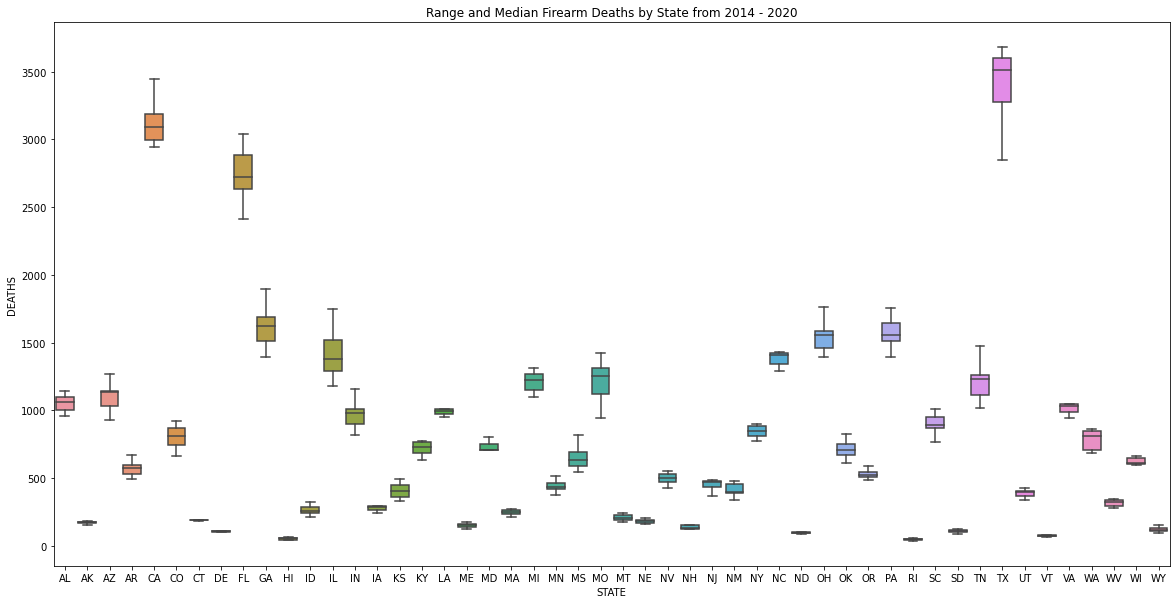

In [8]:
'''
Visualizing the range of firearm death by state from 2014 - 2020
'''

plt.figure(figsize = (20,10))
sns.boxplot(data = df1, 
            x = 'STATE', 
            y = 'DEATHS',
            orient = 'v',
           showfliers = False).set(title = 'Range and Median Firearm Deaths by State from 2014 - 2020')

[Text(0.5, 1.0, 'Alabama Firearm Deaths Range, Median, and Average from 2014 -2020')]

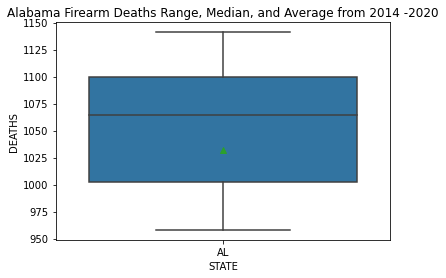

In [9]:
'''
Visualizing the mean number of firearm deaths in Alabama from 2014 - 2020
'''

sns.boxplot(data = df_AL, 
            x = 'STATE', 
            y = 'DEATHS',
            orient = 'v',
           showmeans = True,
           showfliers = False).set(title = 'Alabama Firearm Deaths Range, Median, and Average from 2014 -2020')

[Text(0.5, 1.0, 'Range and Median Rate of Deaths by State')]

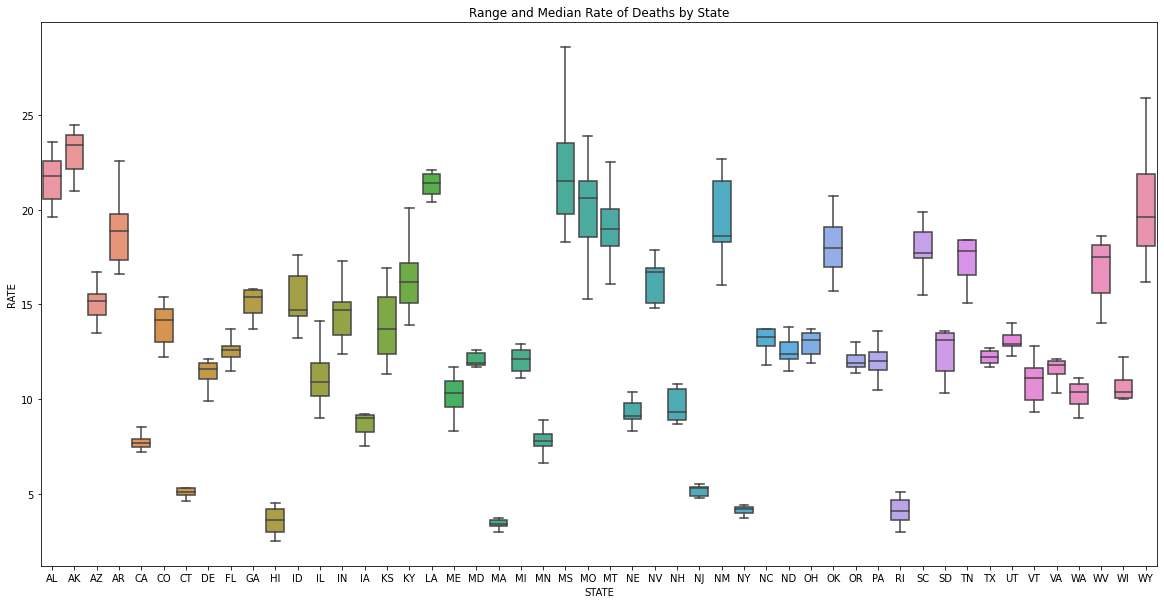

In [10]:
'''
Visualizing the range of firearm death by state from 2014 - 2020
'''

plt.figure(figsize = (20,10))
sns.boxplot(data = df1, 
            x = 'STATE', 
            y = 'RATE',
            orient = 'v',
           showfliers = False).set(title = 'Range and Median Rate of Deaths by State')

In [11]:
df_AL

,YEAR,STATE,RATE,DEATHS,URL
0,2020,AL,23.6,1141,/nchs/pressroom/states/alabama/al.htm
50,2019,AL,22.2,1076,/nchs/pressroom/states/alabama/al.htm
100,2018,AL,21.8,1064,/nchs/pressroom/states/alabama/al.htm
150,2017,AL,22.9,1124,/nchs/pressroom/states/alabama/alabama.htm
200,2016,AL,21.5,1046,/nchs/pressroom/states/alabama/alabama.htm
250,2015,AL,19.6,958,/nchs/pressroom/states/alabama/alabama.htm
300,2014,AL,16.9,815,/nchs/pressroom/states/alabama/alabama.htm


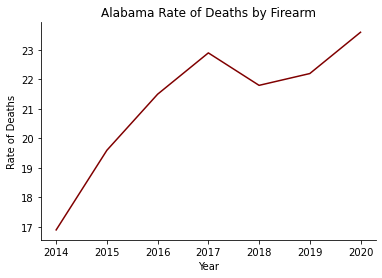

In [12]:
x = (df_AL['YEAR'])
y = (df_AL['RATE'])

'''
multiple ways to get rid of spines, via Matplotlib you do the following:
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
'''

plt.plot(x, y, color = 'maroon')
plt.xlabel("Year")
plt.ylabel("Rate of Deaths")
plt.title("Alabama Rate of Deaths by Firearm")
sns.despine() # shortcut to get rid of top and right
plt.show()

In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [14]:
df_AL

,YEAR,STATE,RATE,DEATHS,URL
0,2020,AL,23.6,1141,/nchs/pressroom/states/alabama/al.htm
50,2019,AL,22.2,1076,/nchs/pressroom/states/alabama/al.htm
100,2018,AL,21.8,1064,/nchs/pressroom/states/alabama/al.htm
150,2017,AL,22.9,1124,/nchs/pressroom/states/alabama/alabama.htm
200,2016,AL,21.5,1046,/nchs/pressroom/states/alabama/alabama.htm
250,2015,AL,19.6,958,/nchs/pressroom/states/alabama/alabama.htm
300,2014,AL,16.9,815,/nchs/pressroom/states/alabama/alabama.htm


In [15]:
df_AL1 = df_AL.set_index('YEAR')
df_AL2 = df_AL1[['DEATHS']]
df_AL3 = df_AL1[['RATE']]

In [16]:
color_pal = sns.color_palette()
color_pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<AxesSubplot:xlabel='YEAR'>

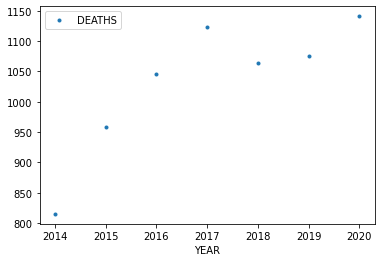

In [17]:
df_AL2.plot(style = '.')

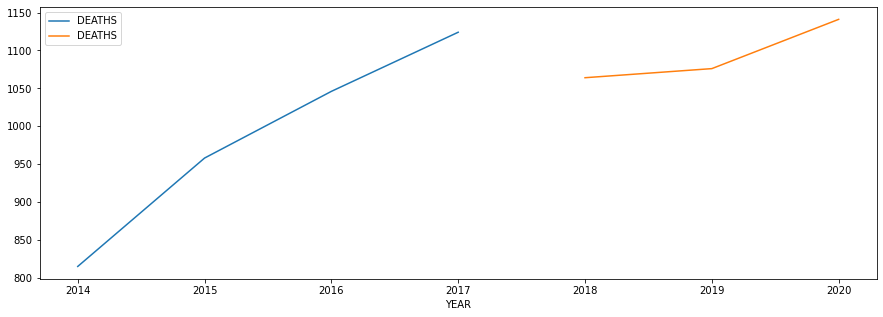

In [18]:
train = df_AL2.loc[df_AL2.index < 2018]
test = df_AL2.loc[df_AL2.index >= 2018]

fig, ax = plt.subplots(figsize = (15, 5))
train.plot(ax = ax, label = 'Training set')
test.plot(ax = ax, label = 'Test set')
plt.show()

In [19]:
df_AL2.columns

Index(['DEATHS'], dtype='object')

In [20]:
train = create_features(train)
test = create_features(test)

df_AL2.columns

FEATURES = ['']

NameError: name 'create_features' is not defined

In [ ]:
reg = xgb.XGBRFRegressor(n_estim = 1000)
reg.fit